In [1]:
import numpy as np
import time
import delfi
import L96
import matplotlib.pyplot as plt

seed = 42

Updating julia wrappers, compilation might take a while....
...julia wrappers have been updated.


# define simulation setup

In [2]:
K, J, dt = 36, 10, 0.001

# observation points k, t
obs_X_grid = np.arange(0, K, 1)  # currently observe ALL X_i !
K_obs = len(obs_X_grid)
obs_times = np.arange(1., 11., 100 * dt)   # simulate [0, 2] and use [1, 2] as summary stats (first sec 'burn-in')
obs_nsteps = len(obs_times)

In [3]:
sim = L96.L96TwoSim(K=K, J=J, dt=dt, obs_X=obs_X_grid, obs_times=obs_times, seed=seed)

# set parameters

In [4]:
pars = np.array([10, 1, 10, np.log(10)]) # (F, h, b, log c)

## test and compare different solvers

In [5]:
# pure julia
t0 = time.time()
d_julia = sim.gen_single(pars)
t_julia = time.time() - t0

# julia solver, numba/python derivatives
t0 = time.time()
d_numba = sim.gen_single(pars, use_juliadef=False)
t_numba = time.time() - t0

# scipy solver, numba/python derivatives
t0 = time.time()
d_scipy = sim.gen_single(pars, use_julia=False)
t_scipy = time.time() - t0

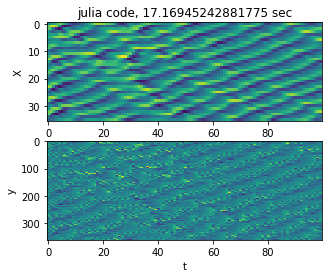

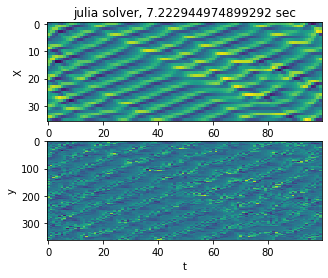

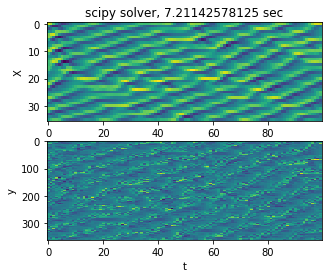

In [6]:
for d,t,n in zip([d_julia, d_numba, d_scipy], 
                 [t_julia, t_numba, t_scipy],
                 ['julia code', 'julia solver', 'scipy solver']):

    X = d['data'][0].reshape(-1, K).T
    Y = d['data'][1].reshape(-1, K * J).T

    plt.figure()
    plt.subplot(2,1,1)
    plt.imshow(X,aspect=1.0)
    plt.ylabel('X')
    plt.title(f'{n}, {t} sec')
    plt.subplot(2,1,2)
    plt.imshow(Y,aspect=1/J)
    plt.ylabel('y')
    plt.xlabel('t')